In [1]:
import numpy as np
import pennylane as qml
from matplotlib import pyplot as plt

import sys
sys.path.append('../')

In [2]:
Iqml = np.identity(2)
Zqml = np.array([[1,0],[0,-1]])

#Temperature
Tc = 0.4
Th = 0.8

T1 = Tc
T2 = Th

beta_c = 1/Tc # 1/Tc
beta_h = 1/Th # 1/Th

# Parameters
w1 = 0.75
w2 = 1
wc = w1
wh = w2

gch = 0.8
g12 = 0.8

# Strokes durations
tq = 1
tw = 1

# Number of Measurement
N = 8

#Trotter steps
M = 1

H1 = (w1 / 2) * Zqml
H2 = (w2 / 2) * Zqml

Hc = (wc / 2) * Zqml
Hh = (wh / 2) * Zqml

if Tc/Th <= w1/w2 and w1/w2 <= 1:
    print("The system is an engine.")
elif w1/w2 < Tc/Th:
    print("The system is a refrigerator.")
elif w1>w2:
    print("The system is a heat accelerator.")

The system is an engine.


In [3]:
%run ./1-strob_theory.ipynb strob_theory

Classical simulation is finished.


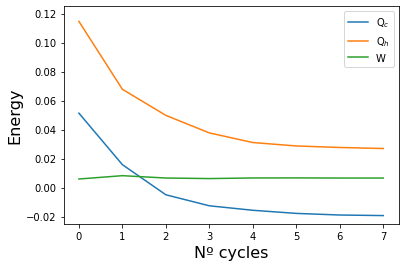

In [4]:
fig, axes = plt.subplots(1,1)

axes.plot(range(N), Qc_sim, color='tab:blue', label='Q$_c$')
axes.plot(range(N), Qh_sim, color='tab:orange', label='Q$_h$')
axes.plot(range(N), W_sim, color='tab:green', label='W')

#axes.set_title('\n $\omega_1$ = ' + str(w1) + ', $\omega_2$ = ' + str(w2) + ', g = ' + str(gch)
#               + ', T$_c$ = ' + str(Tc) + ', T$_h$ = ' + str(Th)
#              )
axes.set_xlabel('Nº cycles', fontsize=16)
axes.set_ylabel('Energy', fontsize=16)
axes.set_ylim([-0.025, 0.125])
axes.legend(loc=1);

In [5]:
def dag(x):
    return x.T.conjugate()

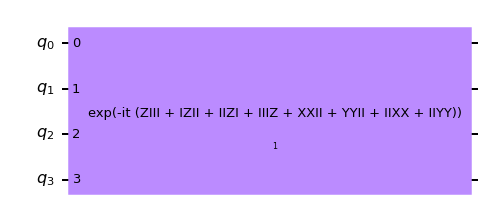

In [6]:
from qiskit.opflow import I, X, Y, Z
from qiskit.opflow import Zero, ListOp, PauliExpectation, PauliTrotterEvolution, CircuitSampler, MatrixEvolution, Suzuki

Hq = (wc/2) * (Z^I^I^I) + (w1/2) * (I^Z^I^I) + (w2/2) * (I^I^Z^I) + (wh/2) * (I^I^I^Z) + \
     (gch/2) * (X^X^I^I) + (gch/2) * (Y^Y^I^I) + (gch/2) * (I^I^X^X) + (gch/2) * (I^I^Y^Y) 

Uq = (tq*Hq).exp_i()

Uq_trotter = PauliTrotterEvolution(trotter_mode=Suzuki(order=1, reps=1)).convert(Uq)

qc_heat = Uq_trotter.to_circuit()

qc_heat.draw('mpl')

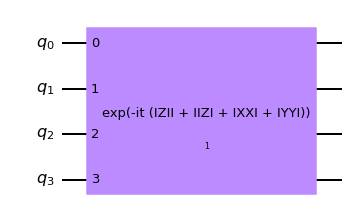

In [7]:
#Work Stroke (Heat Circuit + Work Circuit)
Hw = (w1/2) * (I^Z^I^I) + (w2/2) * (I^I^Z^I) + \
     (g12/2) * (I^X^X^I) + (g12/2) * (I^Y^Y^I) 

Uw = (tw*Hw).exp_i()

Uw_trotter = PauliTrotterEvolution(trotter_mode=Suzuki(order=1, reps=1)).convert(Uw)

qc_work = Uw_trotter.to_circuit()

qc_work.draw('mpl')

In [8]:
print('Qc =', Qc_sim[-1])
print('Qh =', Qh_sim[-1])
print('Qc + Qh =', Qc_sim[-1]+Qh_sim[-1])
print('W =', W_sim[-1])

Qc = -0.01932688350390165
Qh = 0.026931187967717905
Qc + Qh = 0.0076043044638162555
W = 0.006561489724730022


In [9]:
fid_uq = np.trace(Uq_trotter.to_matrix().dot(dag(Uq.to_matrix())))/len(np.array(Uq.to_matrix()))
print("Uq Fidelity: ", fid_uq)

Uq Fidelity:  (1.0000000000000002+0j)


In [10]:
fid_uw = np.trace(Uw_trotter.to_matrix().dot(dag(np.array(Uws))))/len(np.array(Uw.to_matrix()))
print("Uw Fidelity: ", fid_uw)

Uw Fidelity:  (0.9978411067736848+0j)
